<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 03


1.0 Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logístico

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib.


> ### Problema:
a. Programar la ecuación para el mapa logístico, y  realizar una grafica del valor de xn como funcion de n.

b. Realizar pruebas para un $x_0=0.5$, con valores de r

```
  r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
  numpoints = 100, # Numero sugerido de iteraciones
  x0 = 0.5
```

Organizar las gráficas [multiples plot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)



c. Construye una rutina llamada logist_map en que entrada el valor de r, la condiciones inicial xi y el número de puntos determine la evolución en el punto N.  Prueba implementado las siguientes lineas.

```
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)

for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000)
  xf[i] = x_i
```


d. Realiza un gráfico de:
```
  plt.plot((r-1/r), xf,  ".", markersize = 0.5)
```


e. Encontrar dos formas adicionales de expresar $f(x)$, para estos valores funcionales determinar las mismas gráficas del numeral 3 para cada uno de las formas de escribir la expresión. En este caso se espera que los resultados varien. ¿A que se debe esto?. Consulta algunas fuentes para responder a la pregunta.


Ref: https://www.youtube.com/watch?v=EOvLhZPevm0&t=104s


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# a.
def mapa_logistico(r, x0, n):
  x = np.zeros(n)
  for i in range(0,n):
    xn = r*x0*(1-x0)
    x[i] = x0
    x0 = xn
  return x

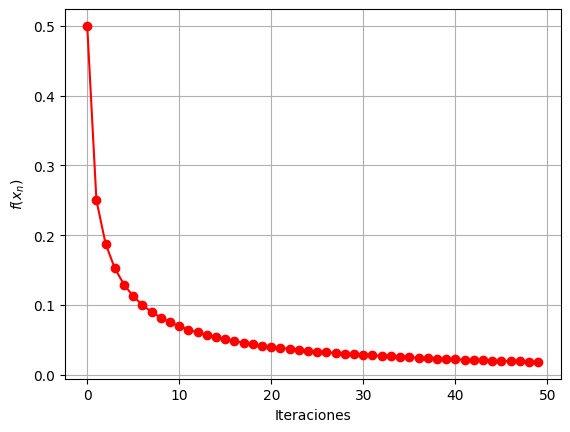

In [4]:
mapa = mapa_logistico(1,0.5,50)

n = np.arange(0,50,1)

plt.plot(n, mapa, 'ro-')
plt.xlabel('Iteraciones')
plt.ylabel('$f(x_n)$')
plt.grid()
plt.show()

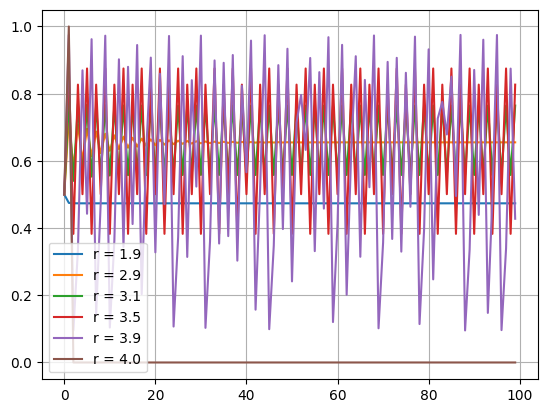

In [5]:
# b.
r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
numpoints = 100 # Numero sugerido de iteraciones
x0 = 0.5
n = np.arange(0,numpoints,1)

for i in r:
  mapas_r = mapa_logistico(i, x0, numpoints)
  plt.plot(n,mapas_r,label = 'r = %0.1f' %i)

plt.grid()
plt.legend()
plt.show()

In [ ]:
# c.
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)

for i in range(0, Np):
  xini = np.random.random()
  x_i = mapa_logistico(r[i], xini,1000)
  xf[i] = x_i[i]

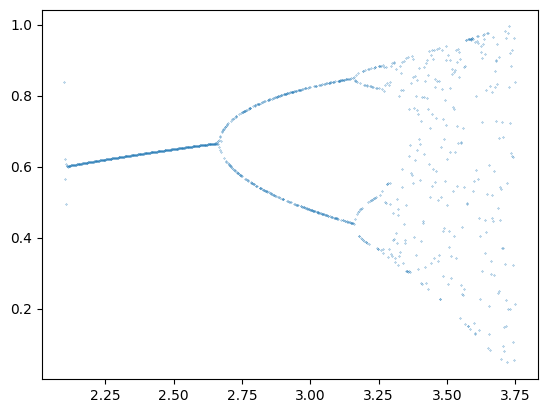

In [ ]:
# d.
plt.plot((r-1/r), xf,  ".", markersize = 0.5)

2. El mapa de Hénon es un sistema dinámico discreto en el tiempo que se define por las siguientes ecuaciones:

$$x_{n+1} = 1 - ax_n^2 + y_n$$
$$y_{n+1} = bx_n$$

Donde $x_n$ y $y_n$ son las coordenadas de un punto en el plano, y $a$ y $b$ son dos parámetros que controlan el comportamiento del mapa. El mapa de Hénon es uno de los ejemplos más estudiados de sistemas dinámicos que muestran comportamiento caótico, es decir, una gran sensibilidad a las condiciones iniciales y una estructura fractal.

El mapa de Hénon fue introducido por Michel Hénon como un modelo simplificado de la sección de Poincaré del modelo de Lorenz, que es otro sistema dinámico caótico que describe la convección atmosférica². Para los valores clásicos del mapa de Hénon, que son $a = 1.4$ y $b = 0.3$, un punto inicial del plano se acercará a un conjunto de puntos conocido como el atractor extraño de Hénon, o divergirá al infinito. El atractor de Hénon es una curva suave en una dirección y un conjunto de Cantor en otra.

Su tarea será:
1. Construir una gráfica de xn como función de N
2. Construir una gráfica de yn como función de N
3. Construir una gráfica de xn, yn.
4. Para b=0.3, construir una curva de xn como función de a, con a entre 0, 1


Reto, con tu codigo, reproducir los fractales mostrados en esta página https://blbadger.github.io/henon-map.html

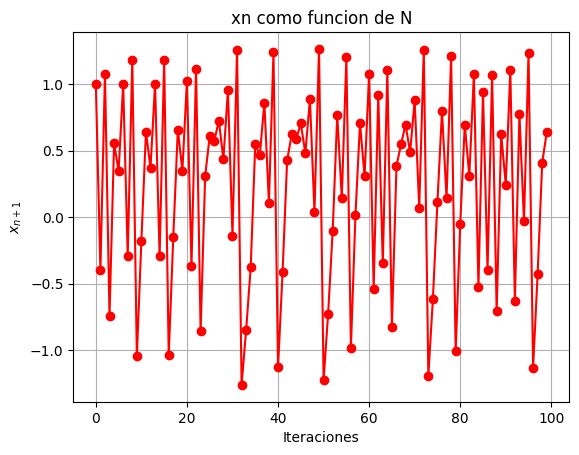

In [7]:
# 1.
def mapa_henon(a, b, x0, y0, n):
  x = np.zeros(n)
  y = np.zeros(n)
  for i in range(n):
      xn = 1 - a * x0**2 + y0
      yn = b * x0
      x[i] = xn
      y[i] = yn
      x0, y0 = xn, yn

  return x,y

x, y = mapa_henon(1.4, 0.3, 0, 0, 100)

n = np.arange(0,100,1)

plt.title('xn como funcion de N')
plt.plot(n, x, 'ro-')
plt.xlabel('Iteraciones')
plt.ylabel('$x_{n+1}$')
plt.grid()
plt.show()

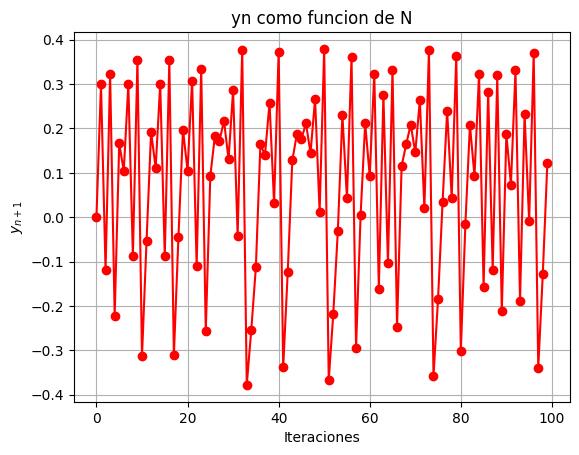

In [9]:
# 2.
plt.title('yn como funcion de N')
plt.plot(n, y, 'ro-')
plt.xlabel('Iteraciones')
plt.ylabel('$y_{n+1}$')
plt.grid()
plt.show()

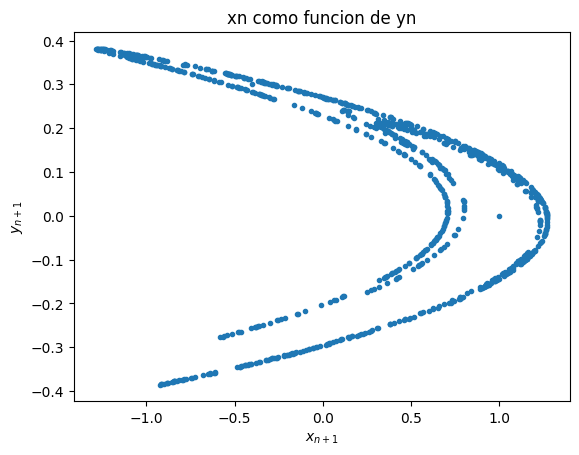

In [12]:
# 3.
x, y = mapa_henon(1.4, 0.3, 0, 0, 1000)
plt.title('xn como funcion de yn')
plt.plot(x, y, '.')
plt.xlabel('$x_{n+1}$')
plt.ylabel('$y_{n+1}$')

plt.show()

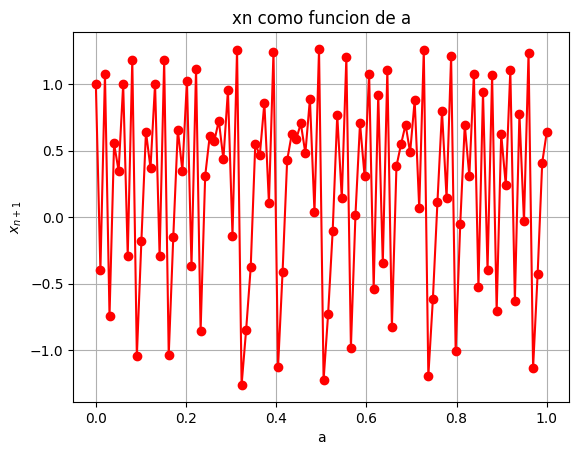

In [13]:
# 4.
x, y = mapa_henon(1.4, 0.3, 0, 0, 100)
a = np.linspace(0,1,100)
plt.title('xn como funcion de a')
plt.plot(a, x, 'ro-')
plt.xlabel('a')
plt.ylabel('$x_{n+1}$')
plt.grid()
plt.show()

3.0 El algoritmo de gradiente descendente permite encontrar el mínimo de funciones en espacios multidimensionales proponiendo puntos en la dirección en la que el gradiente desciende. Para el caso de una dimensión, podemos encontrar el mínimo realizando iteraciones y multiplicando su derivada en cada nuevo punto por una constante $\alpha$

\begin{equation}
x_{i+1}=x_i - \alpha \frac{\mathrm{d}f}{\mathrm{d}x}(x_i)
\end{equation}


Ejemplo:

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual
la derivada de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo.



**Su tarea será**:

1. Disenar un programa, en el que entrada la función y su derivada, definidas como funciones lambda de python, se determine el valor mínimo de esa función.
Prueba tu algoritmo para  la función $f(x) = x^2$

2. Realiza el grafico de la funcion y la derivada, especifica la leyenda de cada curva empleando el metodo legend() de matplotlib.
  

3. Analiza como se minimiza la función, gráficando de la funcion en cada punto a iterar,  como funcion del numero de iteraciones. Para dos valores diferentes de la constante alpha (prueba con $\alpha=0.1$, $\alpha=0.01$)


In [104]:
# 1.
f = lambda x: x**2
dx = lambda x: 2*x

def minimo(f,dx, alpha, w0):
  s = 0
  while (f(w0) > 1e-9):
    wn = w0 - alpha * dx(w0)
    v =  f(wn)
    w0 = wn

    s += 1
  return print(f'El minimo de la funcion se encuentra en x = {w0:.3} +- e-09')

minimo(f, dx, 0.1, 2)

El minimo de la funcion se encuentra en x = 2.85e-05 +- e-09


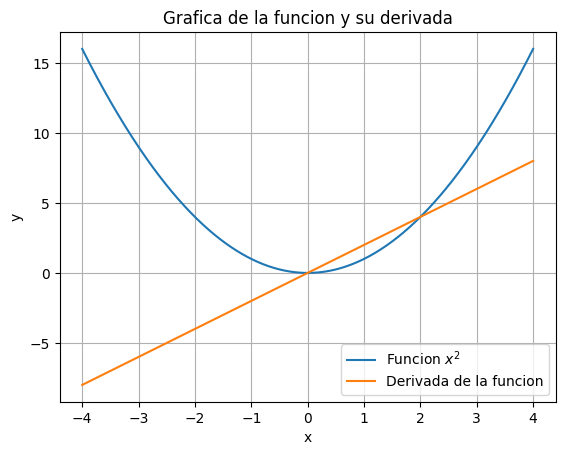

In [61]:
# 2.
x = np.linspace(-4,4,100000)

plt.figure()
plt.title('Grafica de la funcion y su derivada')
plt.plot(x, f(x), label = 'Funcion $x^2$')
plt.plot(x, dx(x), label = 'Derivada de la funcion')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

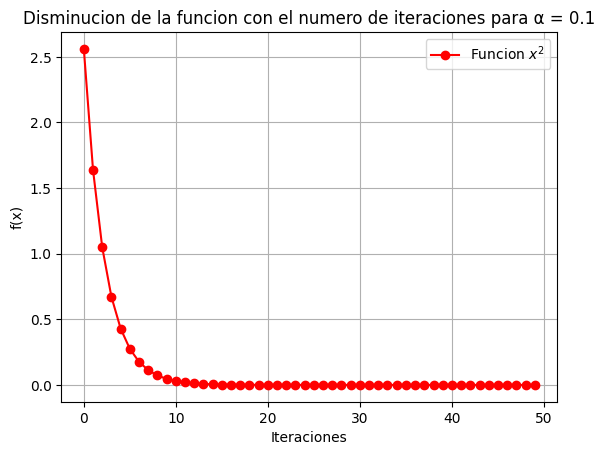

In [102]:
# 3.
x = np.zeros(50)
s = 0
w0 = 2
alpha = 0.1

while (f(w0) > 1e-9):
  wn = w0 - alpha * dx(w0)
  v =  f(wn)
  w0 = wn
  x[s] = wn
  s += 1


plt.figure()
plt.title('Disminucion de la funcion con el numero de iteraciones para α = 0.1')
plt.plot(range(s), f(x), 'ro-', label = 'Funcion $x^2$')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')
plt.grid()
plt.show()

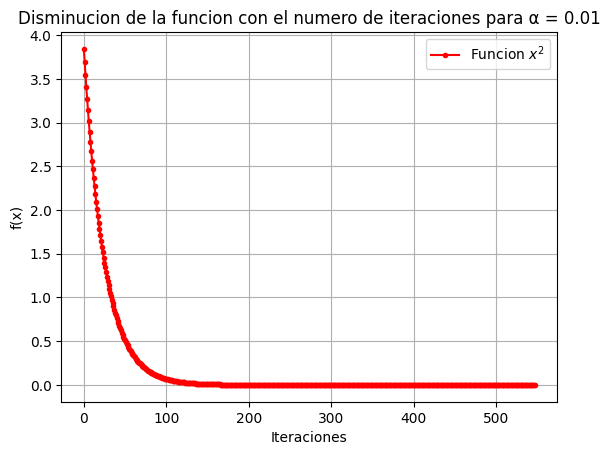

In [105]:
x = np.zeros(548)
s = 0
w0 = 2
alpha = 0.01

while (f(w0) > 1e-9):
  wn = w0 - alpha * dx(w0)
  v =  f(wn)
  w0 = wn
  x[s] = wn
  s += 1


plt.figure()
plt.title('Disminucion de la funcion con el numero de iteraciones para α = 0.01')
plt.plot(range(s), f(x), 'r.-', label = 'Funcion $x^2$')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')
plt.grid()
plt.show()